# Age Prediction for Indian Actors

<font color = 'green' size = 4> This project aims to predict the age range (young, middle or old aged) of Indian actors based on their face profile using <b>Deep Convolutional Neural Networks</b>.

# We plan to use Tensorflow with Keras backend to build our Convolutional Neural Network model.

# Step 1: Importing necessary modules and libraries.

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("train.csv")

<font color = 'green' size = 4>This is pretty self explanatory. We imported these libraries to pre-process data and build our model. We also imported the csv file which contains all the training classes.

# Step 2: Analysing the dataset and how it looks like so we can preprocess it accordingly.

In [2]:
data.head(100)


,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


<font color = 'green' size = 4>So our csv file has two columns. Column <b>'ID'</b> is for the image file name and column <b>'Class'</b> specifies the label for the data. There are 3 classes : <b>'Young', 'Middle', 'Old'</b>.

In [3]:
data.shape

(19906, 2)

<font color = 'green' size = 4>So there are 19906 distinct photos in our dataset.

In [4]:
data['Class']=data['Class'].astype('category')
data['age'] = data['Class'].cat.codes

<font color = 'green' size = 4>Since the entries in <b>'Class'</b> are strings we will need to encode them, so we convert the 'Class' column as 'category' type and then convert it into 'codes'. <b>0 for 'Middle' , 1 for 'Old' and 2 for 'Young'</b>. Now the data looks like as below : 

In [5]:
data.head()

,ID,Class,age
0,377.jpg,MIDDLE,0
1,17814.jpg,YOUNG,2
2,21283.jpg,MIDDLE,0
3,16496.jpg,YOUNG,2
4,4487.jpg,MIDDLE,0


# Step 3: Importing OpenCV and using it for reading and preprocessing images.

In [6]:
import cv2 as cv2

<font color = 'green' size = 4>Below is a function to display (using pyplot) images (read using OpenCV).

In [7]:
def show_photo(img):
    plt.imshow(img,cmap='gray')
    plt.show()

<font color = 'green' size = 4>The following is <b>reading</b> each photo according to the order they appear in our dataset. Additionally it is also <b>resizing</b> each of the image to the size of 40x40. Another thing we're doing here is <b>normalizing</b> each of photo, which basically makes our model work more efficiently.

In [8]:
photos = [cv2.resize(cv2.imread("Train/Train/"+s ,  0),(40,40)) for s in data["ID"]]
photos = [tf.keras.utils.normalize(p) for p in photos]

In [9]:
photos = np.array(photos)
photos.shape
photos = photos.reshape(19906,40,40,1)
photos.shape

(19906, 40, 40, 1)

# Step 4: Building our model
<font color = 'green' size = 4>Our model has 7 layers. It is a combination of <b>2D Convolutions and Dense</b> layers. Activations are <b>Rectified Linear Unit</b> for all layers except for the output layer which has <b>Softmax</b> activation.

In [18]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size = (2,2) , activation = 'relu' , input_shape = (40,40,1)))
model.add(Conv2D(40, kernel_size = (2,2) , activation = 'relu' ))
model.add(Dropout(0.15))
model.add(Conv2D(64, kernel_size = (2,2) , activation = 'relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(80, kernel_size = (2,2) , activation = 'relu'  ))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation = "softmax"))


In [19]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["sparse_categorical_accuracy", "mae"])

<font color = 'green' size = 4><b>Optimizer : Adam<br>Loss : Sparse Categorical Cross Entropy<br></b>This optimizer and loss was found to give the best result in our case.

In [1]:
xtrain=photos
ytrain = data["age"]
data['age'].shape


NameError: name 'photos' is not defined

# Step 5: Training the model with preprocessed data.

In [25]:
model.fit(xtrain,ytrain,epochs = 15,batch_size=128,callbacks=[tf.keras.callbacks.TensorBoard('logs',histogram_freq=1)])

Train on 19906 samples
Epoch 1/15
19906/19906 [==============================] - 83s 4ms/sample - loss: 0.0697 - sparse_categorical_accuracy: 0.9759 - mae: 0.8226
Epoch 2/15
19906/19906 [==============================] - 100s 5ms/sample - loss: 0.0620 - sparse_categorical_accuracy: 0.9780 - mae: 0.8226
Epoch 3/15
19906/19906 [==============================] - 96s 5ms/sample - loss: 0.0631 - sparse_categorical_accuracy: 0.9762 - mae: 0.8226
Epoch 4/15
19906/19906 [==============================] - 96s 5ms/sample - loss: 0.0597 - sparse_categorical_accuracy: 0.9776 - mae: 0.8226
Epoch 5/15
19906/19906 [==============================] - 95s 5ms/sample - loss: 0.0621 - sparse_categorical_accuracy: 0.9786 - mae: 0.8226
Epoch 6/15
19906/19906 [==============================] - 97s 5ms/sample - loss: 0.0603 - sparse_categorical_accuracy: 0.9797 - mae: 0.8226
Epoch 7/15
19906/19906 [==============================] - 95s 5ms/sample - loss: 0.0629 - sparse_categorical_accuracy: 0.9784 - mae: 0.8

In [26]:
# SAVE MODEL
json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(json)
model.save_weights('model2.h5')

<font color = 'green' size = 4>We are trying to minimize the loss with each epoch so we tweaked the model multiple times and this is the bes result we could arrive at.

In [120]:
# LOAD MODEL
from tensorflow.keras.models import model_from_json
json = open('model1.json','r')
model = json.read()
model = model_from_json(model)
model.load_weights('model1.h5')
print(model)

In [27]:
data_test = pd.read_csv('test.csv')
images = [cv2.imread("Test/"+s, 0) for s in data_test['ID']]
test = [cv2.resize(image,(40,40)) for image in images]
test = [tf.keras.utils.normalize(p) for p in test]
test = np.array(test)
test = test.reshape((6636,40,40,1))
test.shape

(6636, 40, 40, 1)

In [28]:
predictions = model.predict_classes(test)

In [29]:
predictions


array([0, 2, 0, ..., 2, 0, 0])

In [30]:
images = [cv2.imread("Test/"+s, 0) for s in data_test['ID']]


In [31]:
age = list(predictions)
age

[0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 0,


In [32]:
for i in range(len(age)):
    if age[i] == 0:
        age[i] = 'MIDDLE'
    elif age[i] == 1:
        age[i] = 'OLD'
    else:
        age[i] = 'YOUNG'

In [33]:
age

['MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDL

In [34]:
dic = {'ID':data_test['ID'], 'Class':age}

x = pd.DataFrame.from_dict(dic)
x.to_csv('output.csv')


In [35]:
def pred_image(img):
    plt.imshow(cv2.imread('Test/'+img,0),cmap='gray')
    plt.show()
    print(x[x['ID']==img])

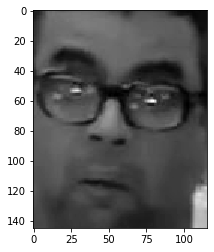

         ID   Class
3844  6.jpg  MIDDLE


In [36]:
pred_image('6.jpg')

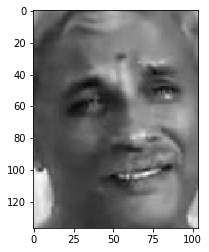

           ID Class
1333  213.jpg   OLD


In [37]:
pred_image('213.jpg')

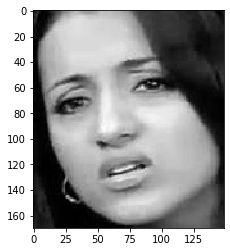

           ID  Class
3936  276.jpg  YOUNG


In [38]:
pred_image('276.jpg')

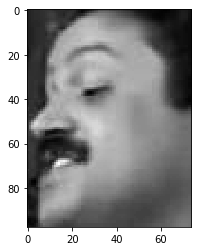

           ID   Class
4724  427.jpg  MIDDLE


In [39]:
pred_image('427.jpg')

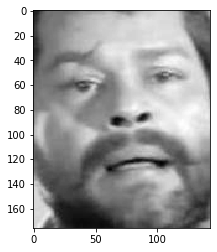

           ID   Class
4646  244.jpg  MIDDLE


In [40]:
pred_image('244.jpg')

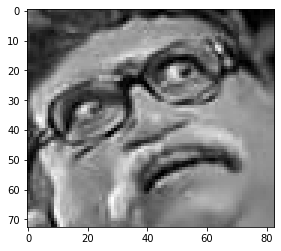

            ID Class
5757  2273.jpg   OLD


In [41]:
pred_image('2273.jpg')

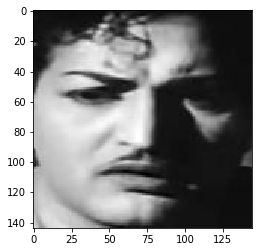

            ID  Class
5272  3698.jpg  YOUNG


In [42]:
pred_image('3698.jpg')

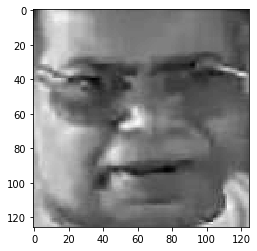

            ID   Class
2299  4439.jpg  MIDDLE


In [43]:
pred_image('4439.jpg')